In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("/Users/shikarichacha/Desktop/PROJECT /1.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
 #Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

In [8]:
scaler

StandardScaler()

In [9]:
X_train_scaled

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [10]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(( accuracy)*100)


85.24590163934425


In [13]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[25,  4],
       [ 5, 27]])

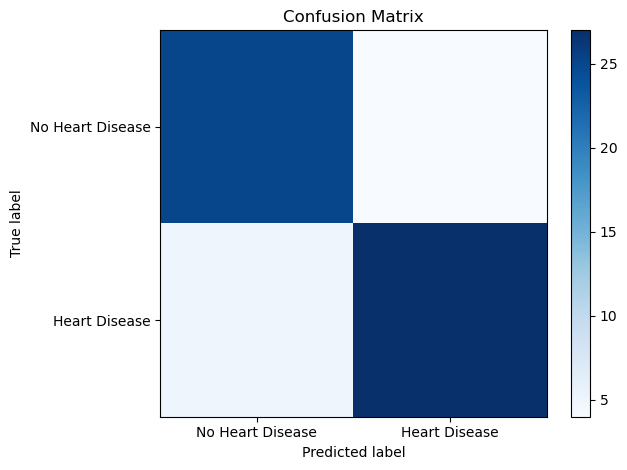

In [14]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['No Heart Disease', 'Heart Disease']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [15]:
# Plot ROC curve
y_score = model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
roc_auc*100

92.67241379310344

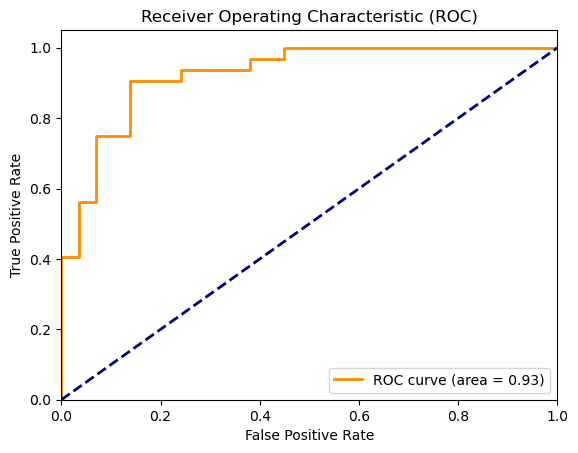

In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [17]:
import pickle

# Save the trained model
with open("92% model.pkl", 'wb') as file:
    pickle.dump(model, file)


# Testing

Accuracy on training data: 0.8547854785478548
Confusion matrix:
[[109  29]
 [ 15 150]]


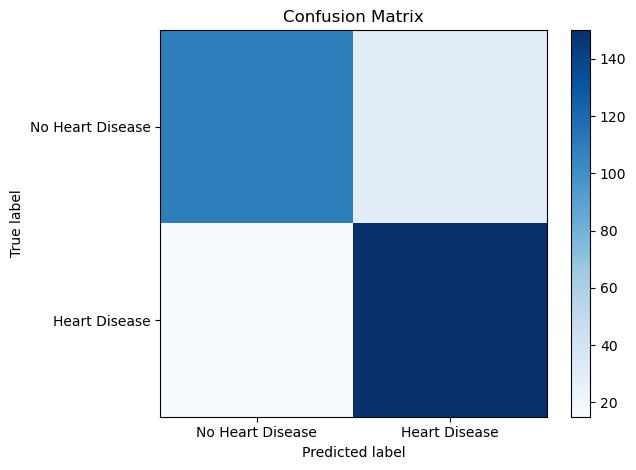

ROC AUC: 0.9215634606938955


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Load the dataset
df = pd.read_csv("/Users/shikarichacha/Desktop/PROJECT /1.csv")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the data using the same scaler as used for training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the trained model
with open("92% model.pkl", 'rb') as file:
    model = pickle.load(file)

# Make predictions
y_pred = model.predict(X_scaled)

# Evaluate the predictions
accuracy = accuracy_score(y, y_pred)
print("Accuracy on training data:", accuracy)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['No Heart Disease', 'Heart Disease']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Plot ROC curve
y_score = model.decision_function(X_scaled)
fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)


In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

# New entry for testing
new_entry = np.array([[20, 0, 0, 140, 100, 0, 1, 10, 0, 1.0, 1, 0, 2]])

# Standardize the new entry using the same scaler as used for training
scaler = StandardScaler()
new_entry_scaled = scaler.fit_transform(new_entry)



# Make prediction on the new entry
prediction = model.predict(new_entry_scaled)

# Convert prediction to human-readable format
prediction_label = "likely to have a heart attack" if prediction[0] == 1 else "not likely to have a heart attack"

# Print prediction
print("Prediction for the new entry:", prediction_label)



Prediction for the new entry: likely to have a heart attack


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def test_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the logistic regression model
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Load the dataset
df = pd.read_csv("/Users/shikarichacha/Desktop/PROJECT /1.csv")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Test the model with different test sizes
test_sizes = [0.1, 0.2, 0.3]
for test_size in test_sizes:
    print(f"Testing model with test size: {test_size}")
    test_model(X, y, test_size=test_size)
    print()


Testing model with test size: 0.1
Accuracy: 0.8065, Precision: 0.8235, Recall: 0.8235, F1-score: 0.8235

Testing model with test size: 0.2
Accuracy: 0.8525, Precision: 0.8710, Recall: 0.8438, F1-score: 0.8571

Testing model with test size: 0.3
Accuracy: 0.8132, Precision: 0.8235, Recall: 0.8400, F1-score: 0.8317



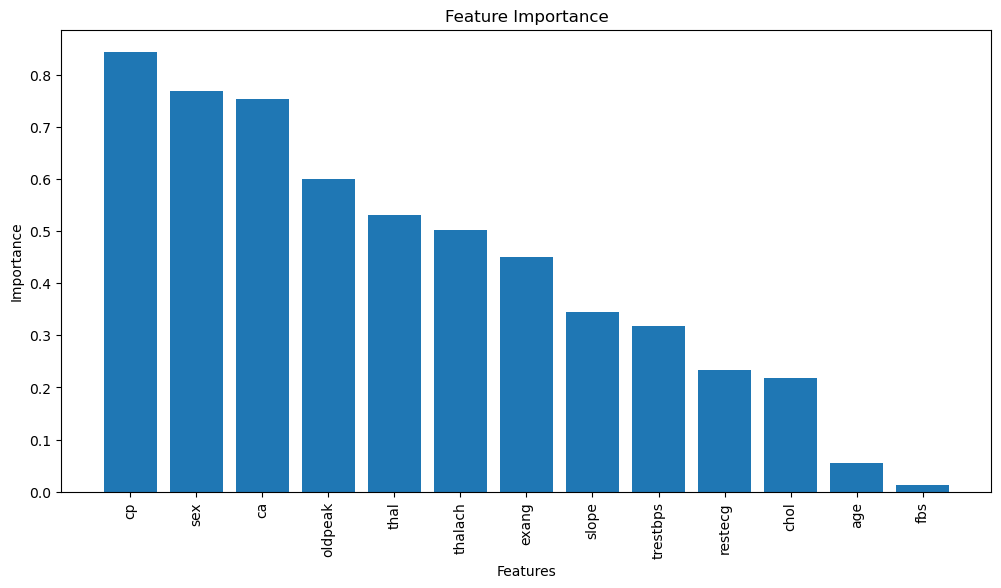

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the model on the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, y)

# Get feature importance
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [39]:
# New entry for feature prediction
new_entry = np.array([[50, 1, 0, 140, 200, 0, 1, 150, 0, 1.0, 1, 0, 2]])

# Standardize the new entry using the same scaler as used for training
new_entry_scaled = scaler.transform(new_entry)

# Make prediction on the new entry
prediction = model.predict(new_entry_scaled)[0]

# Convert prediction to human-readable format
prediction_label = "likely to have a heart attack" if prediction == 1 else "not likely to have a heart attack"

# Print prediction
print("Prediction for the new entry:", prediction_label)


Prediction for the new entry: likely to have a heart attack


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
